In [1]:
!unzip Dartmouth\ Thayer_Data\ Science_Module\ 9_Live\ Coding\ Assignment\ \(2\).zip

Archive:  Dartmouth Thayer_Data Science_Module 9_Live Coding Assignment (2).zip
  inflating: Dartmouth Thayer_Data Science_Module 9_Live Coding Assignment.pdf  
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
import plotly.express as px

In [7]:
import seaborn as sns

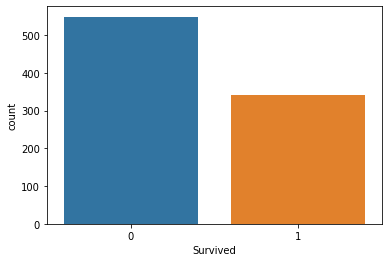

In [10]:
sns.countplot(data = train_df, x = 'Survived')

In [12]:
train_df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

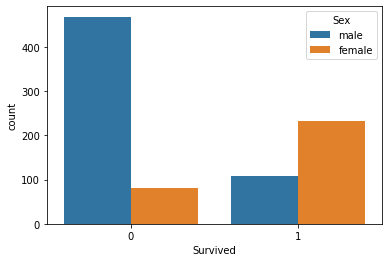

In [13]:
sns.countplot(data = train_df, x = 'Survived', hue = 'Sex')

In [14]:
import matplotlib.pyplot as plt

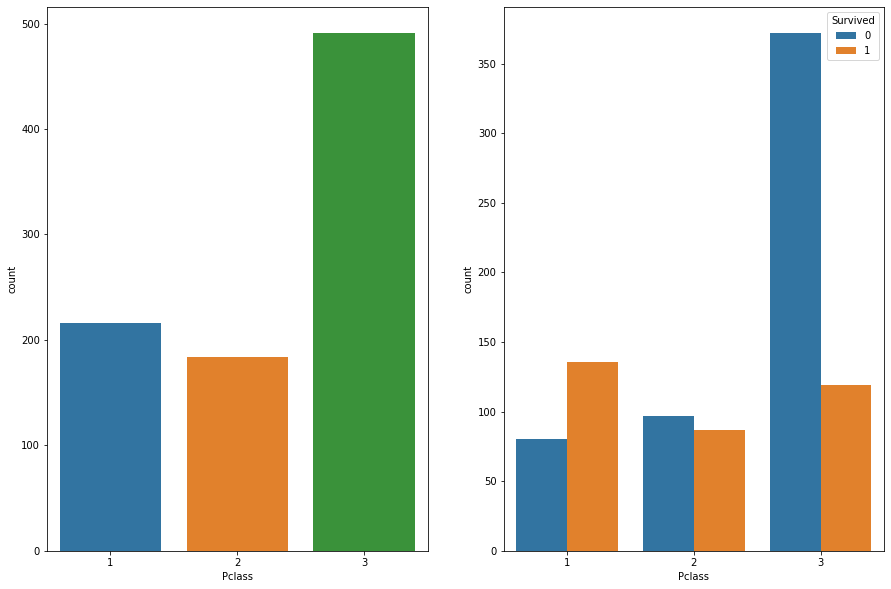

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.countplot(data = train_df, x = 'Pclass', ax = ax[0])
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived', ax = ax[1])

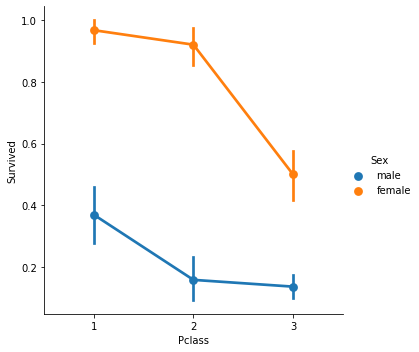

In [18]:
sns.catplot(data = train_df, x = 'Pclass', y = 'Survived', hue = 'Sex', kind = 'point')

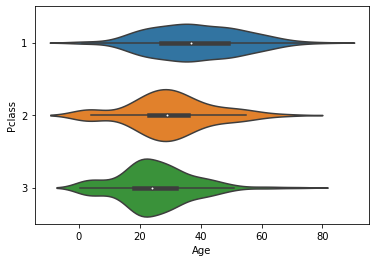

In [20]:
sns.violinplot(data = train_df, x = 'Age', y = 'Pclass', orient='h')

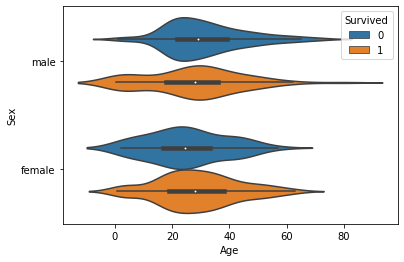

In [21]:
sns.violinplot(data = train_df, x = 'Age', y = 'Sex', hue = 'Survived', orient='h')

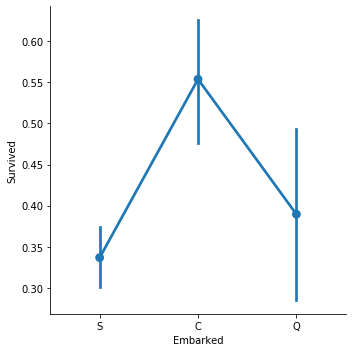

In [22]:
sns.catplot(data = train_df, x = 'Embarked', y = 'Survived', kind = 'point')

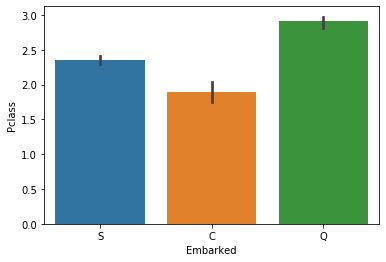

In [23]:
sns.barplot(data = train_df, x = 'Embarked', y = 'Pclass')

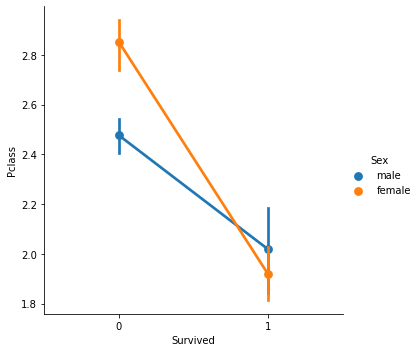

In [24]:
sns.catplot(data = train_df, x = 'Survived', y = 'Pclass', hue = 'Sex', kind = 'point')

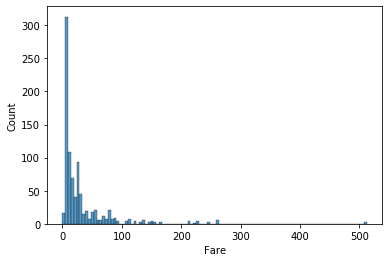

In [31]:
sns.histplot(data = train_df, x = 'Fare')

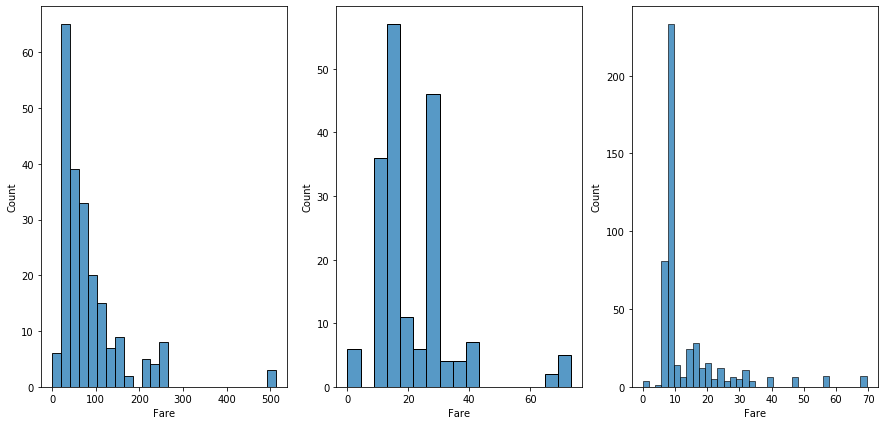

In [38]:
fig, ax = plt.subplots(1, 3, figsize = (15, 7))
for i in range(3):
    sns.histplot(train_df.loc[train_df['Pclass'] == i + 1]['Fare'], ax = ax[i])

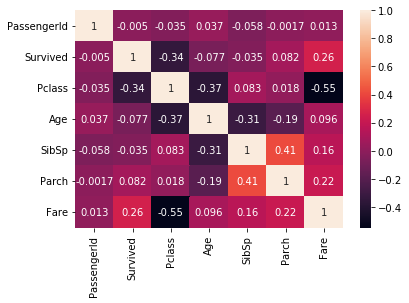

In [40]:
sns.heatmap(train_df.corr(), annot = True)

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  age_group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [51]:
train_df['age_group'] = pd.qcut(train_df['Age'], 5, labels = [1, 2, 3, 4, 5])

In [54]:
train_df['fare_band'] = pd.qcut(train_df['Fare'], 4, labels = [1, 2, 3, 4])

In [55]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3,3


In [57]:
train_df = pd.get_dummies(train_df, columns = ['Sex', 'Embarked'], drop_first=True)

In [59]:
df_train = train_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis = 1)

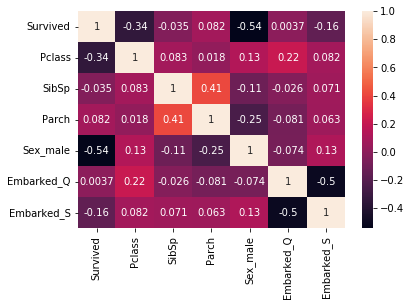

In [61]:
sns.heatmap(df_train.corr(), annot = True)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [63]:
df_train = df_train.dropna()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis = 1),
                                                    df_train['Survived'],
                                                   stratify = df_train['Survived'])

In [66]:
models = [SVC(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(),
         GaussianNB(), RandomForestClassifier()]

In [67]:
accuracies = []
for model in models:
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [78]:
pd.DataFrame({'model': [model for model in models],
             'acc': accuracies})

,model,acc
0,SVC(),0.787709
1,LogisticRegression(),0.748603
2,DecisionTreeClassifier(),0.743017
3,KNeighborsClassifier(),0.737430
4,GaussianNB(),0.731844
5,"(DecisionTreeClassifier(max_features='auto', r...",0.743017


In [79]:
from sklearn.model_selection import cross_val_score

In [81]:
import numpy as np

In [82]:
means, stds = [], []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    mean = np.mean(scores)
    sd = np.std(scores)
    means.append(mean)
    stds.append(sd)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklear

In [84]:
models_df = pd.DataFrame({'model': models, 'mean': means, 'sd': stds})

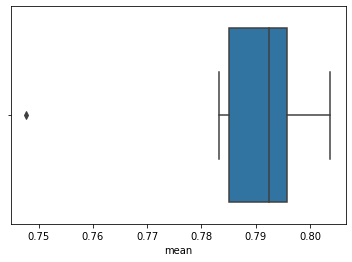

In [85]:
sns.boxplot(data = models_df, x = 'mean')

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

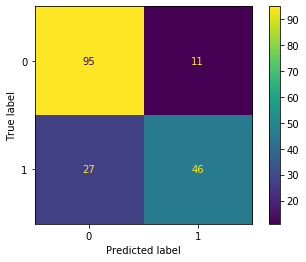

In [89]:
ConfusionMatrixDisplay.from_estimator(models[0], X_test, y_test)

In [90]:
len(models)

6

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


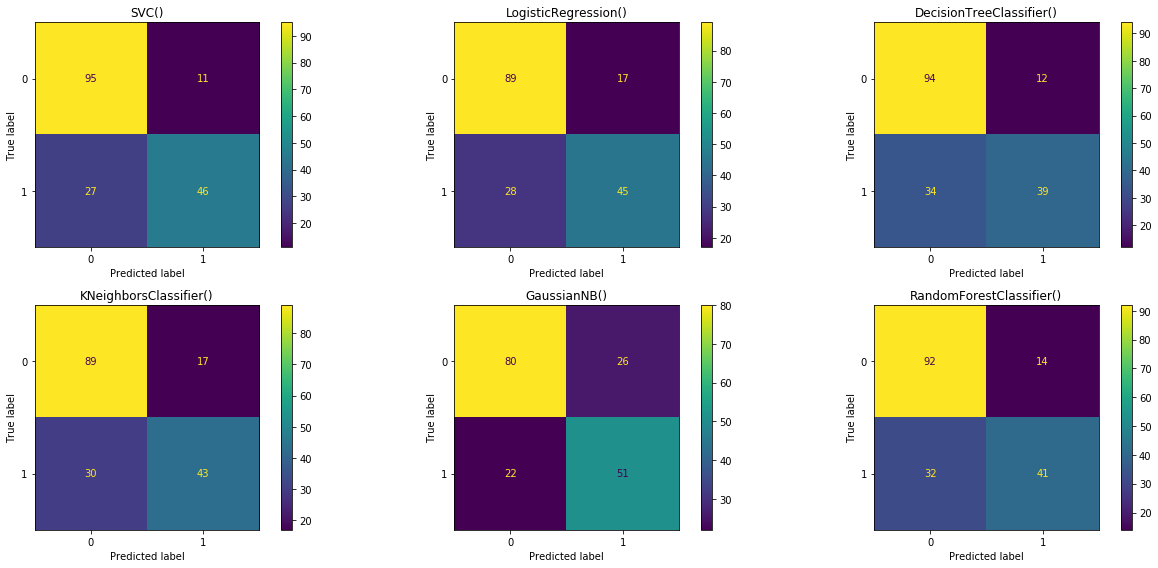

In [94]:
count = 0
fig, ax = plt.subplots(2, 3, figsize = (18, 8))
for i in range(2):
    for j in range(3):
        ConfusionMatrixDisplay.from_estimator(models[count], X_test, y_test, ax = ax[i, j])
        ax[i, j].set_title(models[count])
        count += 1
plt.tight_layout();